    All knowledge from PRML - Bishop.
    Very useful code from Martin Krasser blog.
    https://github.com/krasserm/bayesian-machine-learning/blob/master/bayesian_linear_regression_util.py

In [36]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats


def plot_data(x, t):
    plt.scatter(x, t, marker='o', c="k", s=20)


def plot_truth(x, y, label='Truth'):
    plt.plot(x, y, 'k--', label=label)


def plot_predictive(x, y, std, y_label='Prediction', std_label='Uncertainty', plot_xy_labels=True):
    y = y.ravel()
    std = std.ravel()

    plt.plot(x, y, label=y_label)
    plt.fill_between(x.ravel(), y + std, y - std, alpha = 0.5, label=std_label)

    if plot_xy_labels:
        plt.xlabel('x')
        plt.ylabel('y')


def plot_posterior_samples(x, ys, plot_xy_labels=True):
    plt.plot(x, ys[:, 0], 'r-', alpha=0.5, label='Post. samples')
    for i in range(1, ys.shape[1]):
        plt.plot(x, ys[:, i], 'r-', alpha=0.5)

    if plot_xy_labels:
        plt.xlabel('x')
        plt.ylabel('y')


def plot_posterior(mean, cov, w0, w1):
    resolution = 10

    grid_x = grid_y = np.linspace(-40, 40, resolution)
    grid_flat = np.dstack(np.meshgrid(grid_x, grid_y)).reshape(-1, 2)

    densities = stats.multivariate_normal.pdf(grid_flat, mean=mean.ravel(), cov=cov).reshape(resolution, resolution)
    plt.imshow(densities, origin='lower', extent=(-40, 40, -40, 40))
    plt.scatter(w0, w1, marker='x', c="r", s=20, label='Truth')

    plt.xlabel('w0')
    plt.ylabel('w1')


def print_comparison(title, a, b, a_prefix='np', b_prefix='br'):
    print(title)
    print('-' * len(title))
    print(f'{a_prefix}:', a)
    print(f'{b_prefix}:', b)
    print()

#### Posterior and posterior predictive distribution

In [2]:
import numpy as np


def posterior(Phi, t, alpha, beta, return_inverse=False):
    """Computes mean and covariance matrix of the posterior distribution."""
    S_N_inv = alpha * np.eye(Phi.shape[1]) + beta * Phi.T.dot(Phi)
    S_N = np.linalg.inv(S_N_inv)
    m_N = beta * S_N.dot(Phi.T).dot(t)

    if return_inverse:
        return m_N, S_N, S_N_inv
    else:
        return m_N, S_N


def posterior_predictive(Phi_test, m_N, S_N, beta):
    """Computes mean and variances of the posterior predictive distribution."""
    y = Phi_test.dot(m_N)
    # Only compute variances (diagonal elements of covariance matrix)
    y_var = 1 / beta + np.sum(Phi_test.dot(S_N) * Phi_test, axis=1)
    
    return y, y_var

#### Example datasets

In [7]:
#imports
import numpy as np
import pandas as pd

In [42]:
#read data
df_data = pd.read_csv ('./datasets/boston-housing.csv')
#train and test data separation
msk = np.random.rand(len(df_data)) < 0.9
df = df_data[msk]
df_test = df_data[~msk]
df.head (2)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [44]:
#f_w0 = -0.3
#f_w1 =  0.5
f_w0 = -33.38
f_w1 =  8.98

def f(X, noise_variance):
    '''Linear function plus noise'''
    return f_w0 + f_w1 * X + noise(X.shape, noise_variance)


def g(X, noise_variance):
    '''Sinus function plus noise'''
    return 0.5 + np.sin(2 * np.pi * X) + noise(X.shape, noise_variance)


def noise(size, variance):
    return np.random.normal(scale=np.sqrt(variance), size=size)

#### Basis functions

In [4]:
def identity_basis_function(x):
    return x


def gaussian_basis_function(x, mu, sigma=0.1):
    return np.exp(-0.5 * (x - mu) ** 2 / sigma ** 2)


def polynomial_basis_function(x, degree):
    return x ** degree


def expand(x, bf, bf_args=None):
    if bf_args is None:
        return np.concatenate([np.ones(x.shape), bf(x)], axis=1)
    else:
        return np.concatenate([np.ones(x.shape)] + [bf(x, bf_arg) for bf_arg in bf_args], axis=1)

#### Straight line fitting

w_samples =  [[-33.61115382 -33.51724299 -34.08441457 -33.81856707 -33.60849246]
 [  9.01367601   8.99421706   9.09595504   9.04596725   9.01803883]]
w_samples =  [[-44.85952185 -44.9209289  -44.60579022 -44.79160798 -44.75331957]
 [ 10.96314707  10.97052679  10.92724401  10.95312724  10.94886671]]
w_samples =  [[-36.64249197 -36.85171569 -36.97280993 -36.94152206 -36.76966847]
 [  9.48034286   9.51165051   9.53043239   9.52776668   9.49507709]]


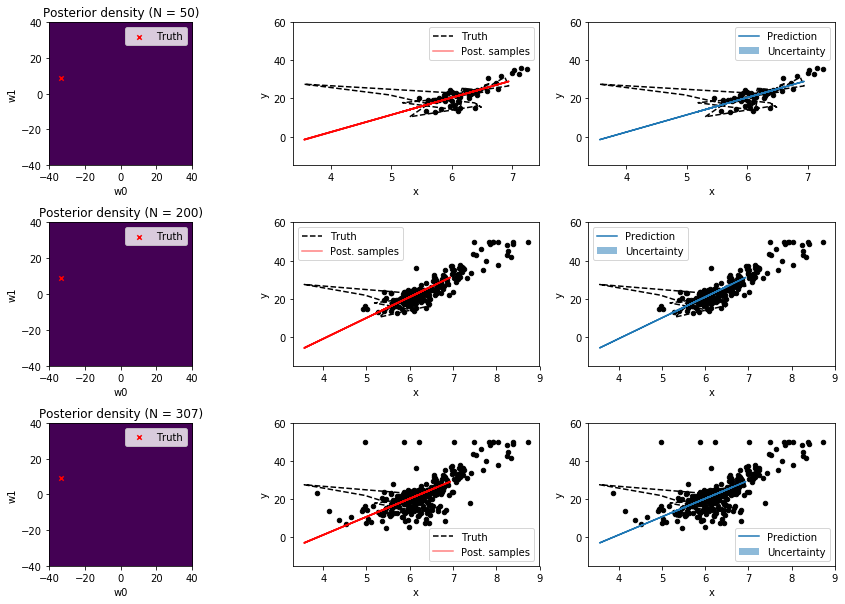

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

# Training dataset sizes
N_list = [50, 200, 307]

beta = 25.0
alpha = 2.0

# Training observations in [-1, 1)
#X = np.random.rand(N_list[-1], 1) * 2 - 1
X = df ['rm'].to_numpy ().reshape (df.shape[0], 1)

# Training target values
#t = f(X, noise_variance=1/beta)
t = df ['medv'].to_numpy ().reshape (df.shape[0], 1)

# Test observations
#X_test = np.linspace(-1, 1, 100).reshape(-1, 1)
X_test = df_test ['rm'].to_numpy ().reshape (df_test.shape[0], 1)

# Function values without noise 
#y_true = f(X_test, noise_variance=0)
y_true = df_test ['medv'].to_numpy ().reshape (df_test.shape[0], 1)

# Design matrix of test observations
Phi_test = expand(X_test, identity_basis_function)

plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace=0.4)

for i, N in enumerate(N_list):
    X_N = X[:N]
    t_N = t[:N]

    # Design matrix of training observations
    Phi_N = expand(X_N, identity_basis_function)
    
    # Mean and covariance matrix of posterior
    m_N, S_N = posterior(Phi_N, t_N, alpha, beta)
    #print ('m_N = ', m_N, 'S_N = ', S_N)
    
    # Mean and variances of posterior predictive 
    y, y_var = posterior_predictive(Phi_test, m_N, S_N, beta)
    #print ('y = ', y [0:5], 'y_var = ', y_var [0:5])
    
    # Draw 5 random weight samples from posterior and compute y values
    w_samples = np.random.multivariate_normal(m_N.ravel(), S_N, 5).T
    print ('w_samples = ', w_samples)
    y_samples = Phi_test.dot(w_samples)
    #print ('y_samples = ', y_samples [0:5])
    
    
    plt.subplot(len(N_list), 3, i * 3 + 1)
    plot_posterior(m_N, S_N, f_w0, f_w1)
    plt.title(f'Posterior density (N = {N})')
    plt.legend()

    plt.subplot(len(N_list), 3, i * 3 + 2)
    plot_data(X_N, t_N)
    plot_truth(X_test, y_true)
    plot_posterior_samples(X_test, y_samples)
    #plt.ylim(-1.5, 1.0)
    plt.ylim(-15, 60)
    plt.legend()

    plt.subplot(len(N_list), 3, i * 3 + 3)
    plot_data(X_N, t_N)
    plot_truth(X_test, y_true, label=None)
    plot_predictive(X_test, y, np.sqrt(y_var))
    #plt.ylim(-1.5, 1.0)
    plt.ylim(-15, 60)
    plt.legend()


w_samples =  [[ 2.54903411e+01  2.56979373e+01  2.56878847e+01  2.58232946e+01
   2.56771063e+01]
 [ 9.09024158e-02 -4.81452642e-01 -1.62232793e-01  3.30883628e-02
  -1.35689201e+00]
 [-8.95868163e-01  5.78341460e-01 -1.20313260e-01  5.48440058e-01
  -1.76405644e-02]
 [-9.58924765e-01  2.30574726e-02  2.68345561e-01  3.20503962e-01
  -3.34353298e-01]
 [ 6.45602414e-01  3.41167731e-01  1.21469376e-02 -4.69112025e-01
  -2.70414285e-01]
 [ 5.19618560e-01  1.05405377e-01 -4.36242302e-01  1.98488280e+00
   8.87031945e-01]
 [-7.88186764e-01 -1.88039965e-01 -3.39431082e-01  1.25551201e+00
  -6.91873610e-01]
 [-1.05060248e+00 -1.95916082e-01 -6.24639399e-01 -3.28596654e-01
  -5.77087904e-02]
 [ 1.15889477e+00 -9.49238401e-01 -1.51767901e+00  1.83798727e-01
  -7.88610237e-01]
 [-9.14986428e-01  1.88655851e+00  3.93090277e-02 -9.56529513e-01
  -1.51694426e-01]]
w_samples =  [[24.11195679 23.93161908 23.87365387 24.02578532 24.02722318]
 [-0.84734393  0.6550713  -1.04253614  0.63212465 -0.3141620

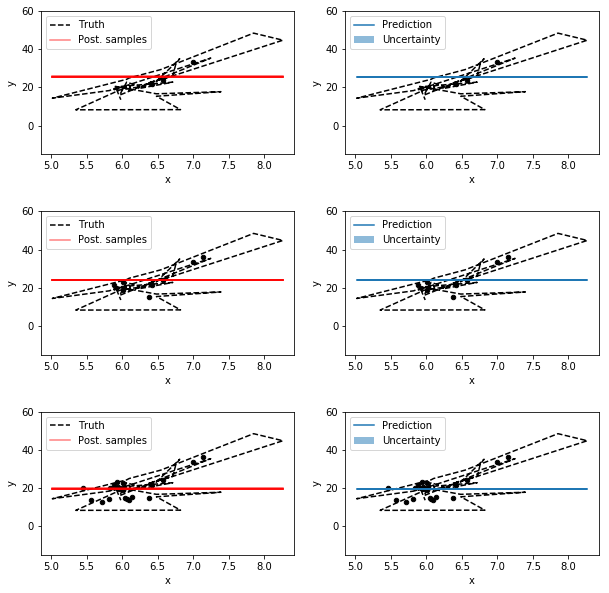

In [46]:
N_list = [3, 8, 20]

beta = 25.0
alpha = 2.0

# Training observations in [-1, 1)
#X = np.random.rand(N_list[-1], 1)
X = df ['rm'].to_numpy ().reshape (df.shape[0], 1)

# Training target values
#t = g(X, noise_variance=1/beta)
t = df ['medv'].to_numpy ().reshape (df.shape[0], 1)

# Test observations
#X_test = np.linspace(0, 1, 100).reshape(-1, 1)
X_test = df_test ['rm'].to_numpy ().reshape (df_test.shape[0], 1)

# Function values without noise 
#y_true = g(X_test, noise_variance=0)
y_true = df_test ['medv'].to_numpy ().reshape (df_test.shape[0], 1)
    
# Design matrix of test observations
Phi_test = expand(X_test, bf=gaussian_basis_function, bf_args=np.linspace(0, 1, 9))

plt.figure(figsize=(10, 10))
plt.subplots_adjust(hspace=0.4)

for i, N in enumerate(N_list):
    X_N = X[:N]
    t_N = t[:N]

    # Design matrix of training observations
    Phi_N = expand(X_N, bf=gaussian_basis_function, bf_args=np.linspace(0, 1, 9))

    # Mean and covariance matrix of posterior
    m_N, S_N = posterior(Phi_N, t_N, alpha, beta)
    
    # Mean and variances of posterior predictive 
    y, y_var = posterior_predictive(Phi_test, m_N, S_N, beta)
    
    # Draw 5 random weight samples from posterior and compute y values
    w_samples = np.random.multivariate_normal(m_N.ravel(), S_N, 5).T
    print ('w_samples = ', w_samples)
    y_samples = Phi_test.dot(w_samples)
    
    plt.subplot(len(N_list), 2, i * 2 + 1)
    plot_data(X_N, t_N)
    plot_truth(X_test, y_true)
    plot_posterior_samples(X_test, y_samples)
    #plt.ylim(-1.0, 2.0)
    plt.ylim(-15, 60)
    plt.legend()
    
    plt.subplot(len(N_list), 2, i * 2 + 2)
    plot_data(X_N, t_N)
    plot_truth(X_test, y_true, label=None)
    plot_predictive(X_test, y, np.sqrt(y_var))
    #plt.ylim(-1.0, 2.0)
    plt.ylim(-15, 60)
    plt.legend()